# CHAOS

## Chaos in Banking Bubbles
We briefly study the relationship of classical chaos in banking bubbles, based on the work of Giovanni Bella and Paolo Mattana (2020), as well as Miao and Wang (2015).

## The Model
We consider the baseline model described in Miao and Wang
(2015), where financial bubbles are faced by a (continuous time)
deterministic economy composed of households, non-financial
firms and banks. The model assumes that households consume,
save and supply labor (normalized to unity). Households own
non-financial firms and banks. Workers and bankers are two type
of agents belonging to each household. Hence, households deposit
their savings in banks that lend thereafter funds to non-financial
firms. Financial bubbles arise in the stock market value of the
banks.

The standard optimization problem faced by the representa-
tive household leads to the following three-dimensional system
of differential equations:

\begin{equation}
\dot{Q} = rQ -Q[r_k+(r_k-r)\xi Q] - \theta(1-Q)
\end{equation}

\begin{equation}
\dot{B} = rB -Q(r_k-r)B
\end{equation}

\begin{equation}
\dot{N} = [r_k-\theta+(r_k-r)\xi Q]N +(r_k-r)B
\end{equation}


where $Q$ is the shadow price of bank's net worth $N$, and $B$ is the
bubble component of the stock market value of a bank, given by
$QN + B$. Moreover, $r$ represents the deposit rate, whereas $r_k$ is
the lending rate. Additionally, ($\xi,\theta$) $\in$ $(0, 1)^2$ are the degree of
financial frictions and the share of banks’ dividends, respectively.

We resort to a simple runge-kutta method to solve the system of differential equations:

In [1]:
import math
# constants
xi = 0.5556 # (0,1)
theta = 0.055 # (0,1)

# parameters
r_k = 0.5 # 
r = 0.015 # Miao and Wang r = 0.015
#r = 0.045 # OGY r = 0.045
# capital parameters:
alpha = 0.33
delta = 0.1

# step size:
h = 0.0000001

# initial conditions:
Q = 1.5  # Steady state value = 1.5
B = 2.36 # Steady state value = 2.36
N = 1.09 # Steady state value = 1.09
t = 0

# functions
def kQ(Q,B,N,t):
    return r*Q-Q*(r_k+(r_k-r)*xi*Q)-theta*(1-Q)

def kB(Q,B,N,t):
    return r*B-Q*(r_k-r)*B

def kN(Q,B,N,t):
    return (r_k-theta+(r_k-r)*xi*Q)*N + (r_k-r)*B

Q_list = list()
Q_list.append(Q)
B_list = list()
B_list.append(B)
N_list = list()
N_list.append(N)
t_list = list()
t_list.append(t)


for i in range(10000000):
    r_k = alpha*math.pow(N + xi*Q*N +B, alpha - 1) - delta
    kQ1 = kQ(Q,B,N,t)
    kQ2 = kQ(Q+h*kQ1/2,B,N,t+h/2)
    kQ3 = kQ(Q+h*kQ2/2,B,N,t+h/2)
    kQ4 = kQ(Q+h*kQ3,B,N,t+h)
    
    kB1 = kB(Q,B,N,t)
    kB2 = kB(Q,B+h*kB1/2,N,t+h/2)
    kB3 = kB(Q,B+h*kB2/2,N,t+h/2)
    kB4 = kB(Q,B+h*kB3,N,t+h)
    
    kN1 = kN(Q,B,N,t)
    kN2 = kN(Q,B,N+h*kN1/2,t+h/2)
    kN3 = kN(Q,B,N+h*kN2/2,t+h/2)
    kN4 = kN(Q,B,N+h*kN3,t+h)
    
    Qn = Q + h*(kQ1 + 2*kQ2 + 2*kQ3 + kQ4)/6
    Bn = B + h*(kB1 + 2*kB2 + 2*kB3 + kB4)/6
    Nn = N + h*(kN1 + 2*kN2 + 2*kN3 + kN4)/6
    
    t = t + h
    Q = Qn
    B = Bn
    N = Nn
    t_list.append(t)
    Q_list.append(Q)
    B_list.append(B)
    N_list.append(N)

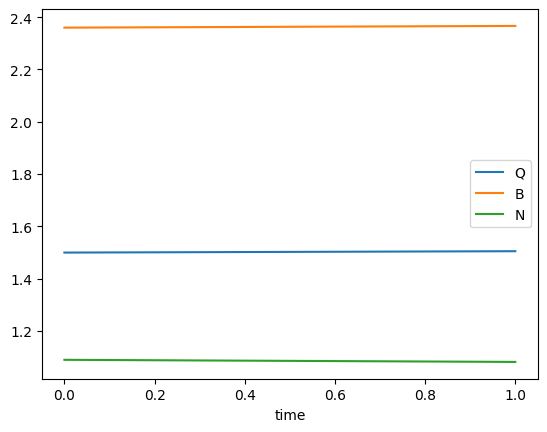

In [2]:
import matplotlib.pyplot as plt 

plt.plot(t_list, Q_list, label = "Q")
#print(Q_list)
#print(t_list)
plt.plot(t_list, B_list, label = "B")
plt.plot(t_list, N_list, label = "N")
plt.xlabel('time')
#plt.yscale('log')
plt.legend()

Text(0, 0.5, 'B')

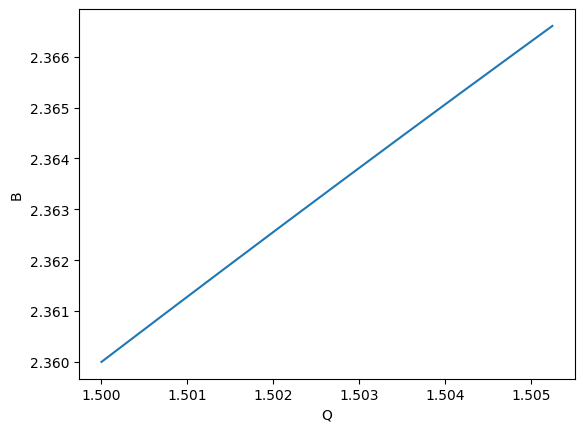

In [3]:
import matplotlib.pyplot as plt

plt.plot(Q_list, B_list)
plt.xlabel("Q")
plt.ylabel("B")

Text(0, 0.5, 'B')

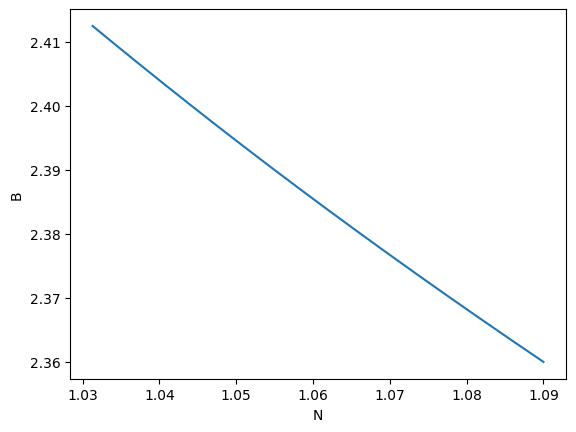

In [11]:
import matplotlib.pyplot as plt

plt.plot(N_list, B_list)
plt.xlabel("N")
plt.ylabel("B")

Text(0, 0.5, 'Q')

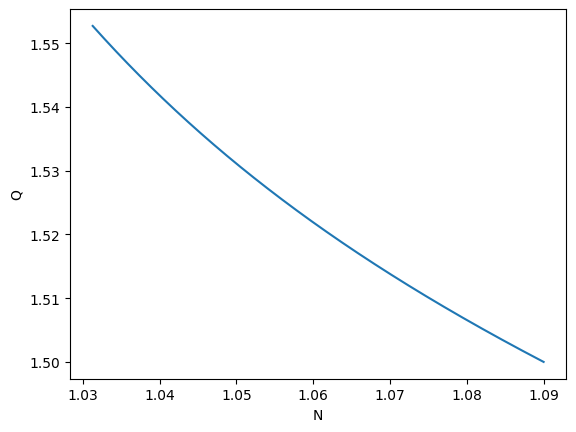

In [12]:
import matplotlib.pyplot as plt

plt.plot(N_list, Q_list)
plt.xlabel("N")
plt.ylabel("Q")

In [18]:
# normalized system
import math
# constants
e1 = 1.1
e2 = -1.3
e3 = 1.5
d = 0.03
k = -1.0

# step size:
h = 0.00001

# initial conditions:
w1 = 1.0
w2 = 1.0
w3 = 1.0
t = 0.0

# functions
def kw1(w1,w2,w3,t):
    return w2

def kw2(w1,w2,w3,t):
    return w3

def kw3(w1,w2,w3,t):
    try:
        x = w1*e1 + w2*e2 + w3*e3 + d*w1**2 + k*w1**3
    except OverflowError:
        print("Oops!", w1)    
    return x

w1_list = list()
w1_list.append(w1)
w2_list = list()
w2_list.append(w2)
w3_list = list()
w3_list.append(w3)
t_list = list()
t_list.append(t)


for i in range(10000000):

    kw11 = kw1(w1,w2,w3,t)
    kw12 = kw1(w1+h*kw11/2,w2,w3,t+h/2)
    kw13 = kw1(w1+h*kw12/2,w2,w3,t+h/2)
    kw14 = kw1(w1+h*kw13,w2,w3,t+h)
    
    kw21 = kw2(w1,w2,w3,t)
    kw22 = kw2(w1,w2+h*kw21/2,w3,t+h/2)
    kw23 = kw2(w1,w2+h*kw22/2,w3,t+h/2)
    kw24 = kw2(w1,w2+h*kw23,w3,t+h)

    if w1**2 > 1e10:
        w1 = 1
    kw31 = kw3(w1,w2,w3,t)
    kw32 = kw3(w1,w2,w3+h*kw31/2,t+h/2)
    kw33 = kw3(w1,w2,w3+h*kw32/2,t+h/2)
    kw34 = kw3(w1,w2,w3+h*kw33,t+h)
    
    w1n = w1 + h*(kw11 + 2*kw12 + 2*kw13 + kw14)/6
    w2n = w2 + h*(kw21 + 2*kw22 + 2*kw23 + kw24)/6
    w3n = w3 + h*(kw31 + 2*kw32 + 2*kw33 + kw34)/6
    
    t = t + h
    w1 = w1n
    w2 = w2n
    w3 = w3n
    t_list.append(t)
    w1_list.append(w1)
    w2_list.append(w2)
    w3_list.append(w3)

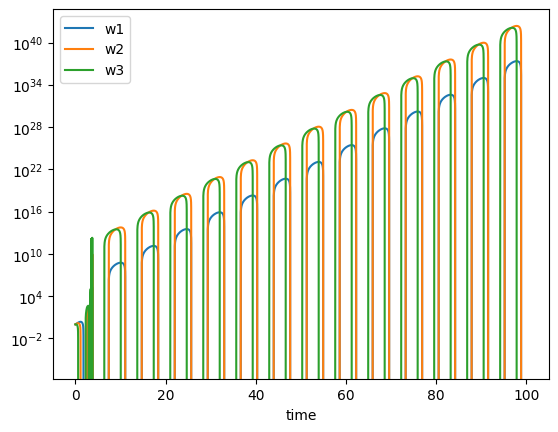

In [20]:
import matplotlib.pyplot as plt 

plt.plot(t_list, w1_list, label = "w1")
#print(Q_list)
#print(t_list)
plt.plot(t_list, w2_list, label = "w2")
plt.plot(t_list, w3_list, label = "w3")
plt.xlabel('time')
plt.yscale('log')
plt.legend()

In [3]:
# Rossler Equation
import math

# parameters:
a = math.sqrt(2)
b = 1.0
c = math.sqrt(2)

# step size:
h = 0.00001

# initial conditions:
x = 1.0
y = 1.0
z = 1.0
t = 0.0

# functions
def kx(x,y,z,t):
    return -x - z

def ky(x,y,z,t):
    return x + a*y

def kz(x,y,z,t):
    return b*x -c*z + x*z


x_list = list()
x_list.append(x)
y_list = list()
y_list.append(y)
z_list = list()
z_list.append(z)
t_list = list()
t_list.append(t)


for i in range(10000000):

    kx1 = kx(x,y,z,t)
    kx2 = kx(x+h*kx1/2,y,z,t+h/2)
    kx3 = kx(x+h*kx2/2,y,z,t+h/2)
    kx4 = kx(x+h*kx3,y,z,t+h)
    
    ky1 = ky(x,y,z,t)
    ky2 = ky(x,y+h*ky1/2,z,t+h/2)
    ky3 = ky(x,y+h*ky2/2,z,t+h/2)
    ky4 = ky(x,y+h*ky3,z,t+h)

    kz1 = kz(x,y,z,t)
    kz2 = kz(x,y,z+h*kz1/2,t+h/2)
    kz3 = kz(x,y,z+h*kz2/2,t+h/2)
    kz4 = kz(x,y,z+h*kz3,t+h)
    
    xn = x + h*(kx1 + 2*kx2 + 2*kx3 + kx4)/6
    yn = y + h*(ky1 + 2*ky2 + 2*ky3 + ky4)/6
    zn = z + h*(kz1 + 2*kz2 + 2*kz3 + kz4)/6
    
    t = t + h
    x = xn
    y = yn
    z = zn
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)
    z_list.append(z)


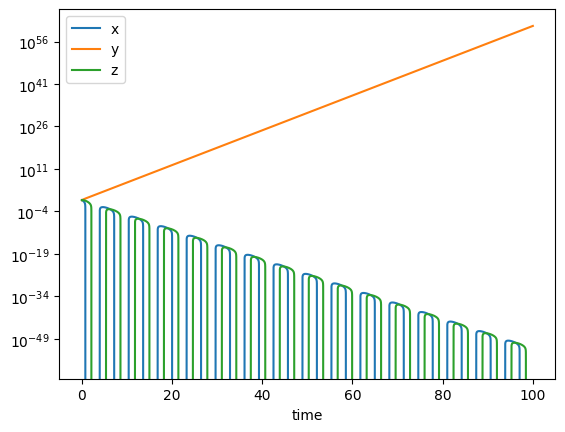

In [10]:
import matplotlib.pyplot as plt 

plt.plot(t_list, x_list, label = "x")
#print(Q_list)
#print(t_list)
plt.plot(t_list, y_list, label = "y")
plt.plot(t_list, z_list, label = "z")
plt.yscale('log')
plt.xlabel('time')
plt.legend()

In [ ]:
plt.plot(x_list, y_list)
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

Text(0, 0.5, 'z')

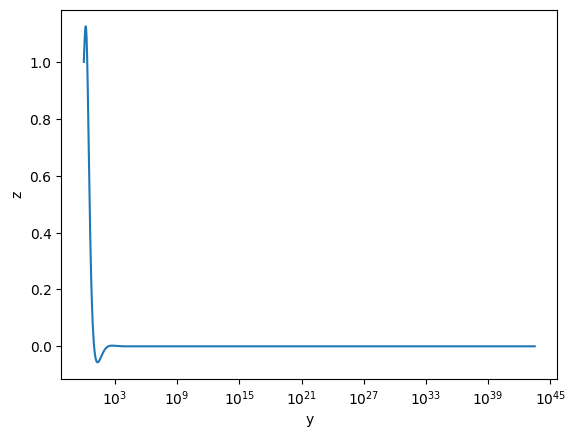

In [7]:
plt.plot(y_list, z_list)
plt.xscale('log')
plt.xlabel('y')
plt.ylabel('z')

Text(0, 0.5, 'z')

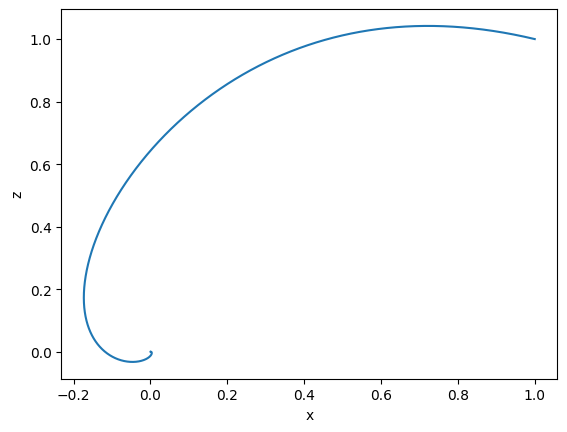

In [4]:
import matplotlib.pyplot as plt 
plt.plot(x_list, z_list)
#plt.yscale('log')
plt.xlabel('x')
plt.ylabel('z')

In [11]:
# transformed Rössler

import math

# parameters:
a = math.sqrt(2)
b = 1.0
c = math.sqrt(2)

# step size:
h = 0.00001

# initial conditions:
U = 0.5
V = 0.5
W = 0.5
t = 0.0

# functions
def kU(U,V,W,t):
    return V

def kV(U,V,W,t):
    return W

def kW(U,V,W,t):
    return -a*U**2 + 3*U*V - a*U*W - a*V**2 + V*W


U_list = list()
U_list.append(U)
V_list = list()
V_list.append(V)
W_list = list()
W_list.append(W)
t_list = list()
t_list.append(t)


for i in range(1000000):

    kU1 = kU(U,V,W,t)
    kU2 = kU(U+h*kU1/2,V,W,t+h/2)
    kU3 = kU(U+h*kU2/2,V,W,t+h/2)
    kU4 = kU(U+h*kU3,V,W,t+h)
    
    kV1 = kV(U,V,W,t)
    kV2 = kV(U,V+h*kV1/2,W,t+h/2)
    kV3 = kV(U,V+h*kV2/2,W,t+h/2)
    kV4 = kV(U,V+h*kV3,W,t+h)

    kW1 = kW(U,V,W,t)
    kW2 = kW(U,V,W+h*kW1/2,t+h/2)
    kW3 = kW(U,V,W+h*kW2/2,t+h/2)
    kW4 = kW(U,V,W+h*kW3,t+h)
    
    Un = U + h*(kU1 + 2*kU2 + 2*kU3 + kU4)/6
    Vn = V + h*(kV1 + 2*kV2 + 2*kV3 + kV4)/6
    Wn = W + h*(kW1 + 2*kW2 + 2*kW3 + kW4)/6
    
    t = t + h
    U = Un
    V = Vn
    W = Wn
    t_list.append(t)
    U_list.append(U)
    V_list.append(V)
    W_list.append(W)

Text(0, 0.5, 'W')

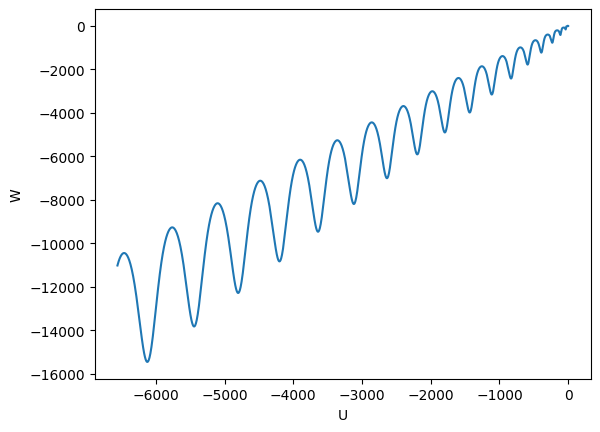

In [12]:
import matplotlib.pyplot as plt 
plt.plot(U_list, W_list)
#plt.yscale('log')
plt.xlabel('U')
plt.ylabel('W')

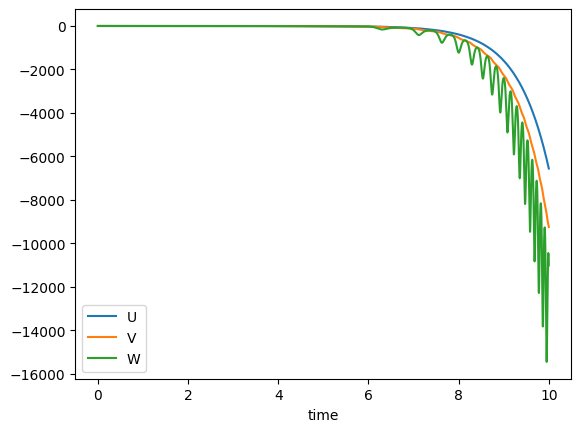

In [14]:
import matplotlib.pyplot as plt 

plt.plot(t_list, U_list, label = "U")

plt.plot(t_list, V_list, label = "V")
plt.plot(t_list, W_list, label = "W")
#plt.yscale('log')
plt.xlabel('time')
plt.legend()

Text(0, 0.5, 'V')

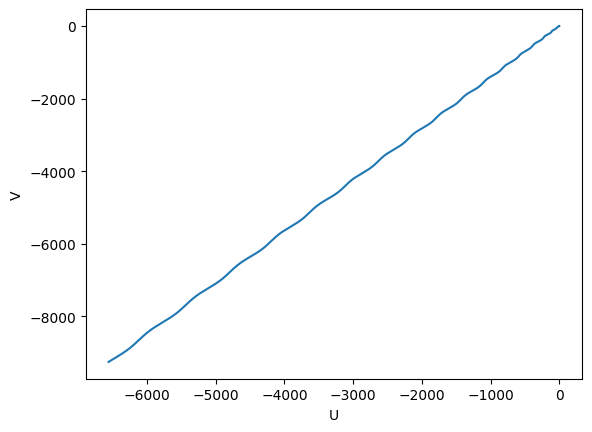

In [15]:
import matplotlib.pyplot as plt 
plt.plot(U_list, V_list)
#plt.yscale('log')
plt.xlabel('U')
plt.ylabel('V')

Text(0, 0.5, 'V')

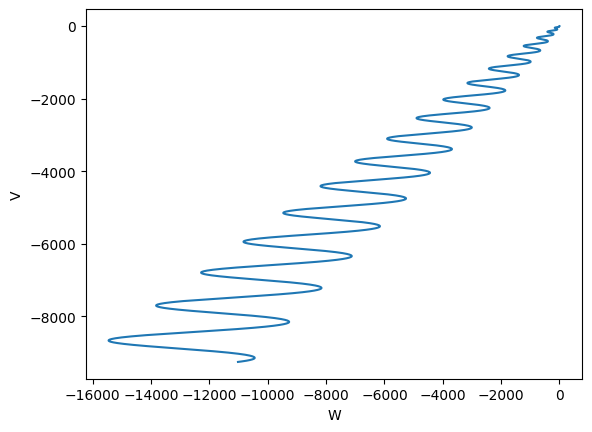

In [16]:
import matplotlib.pyplot as plt 
plt.plot(W_list, V_list)
#plt.yscale('log')
plt.xlabel('W')
plt.ylabel('V')

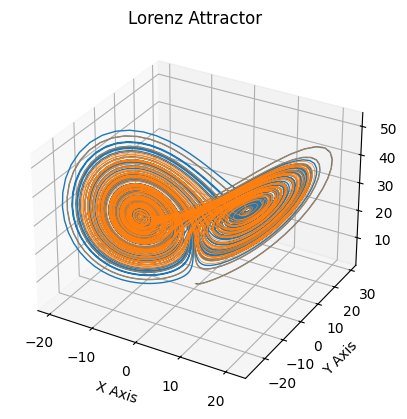

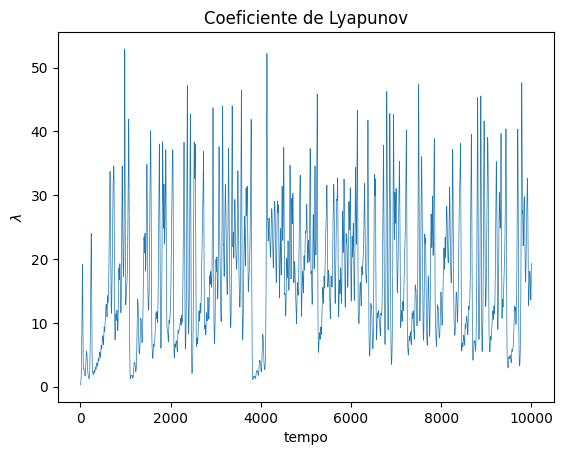

[0.2818611759359561, 0.29402023217265477, 0.3260397697274382, 0.3699673254765203, 0.42159010222386845, 0.47924302712624056, 0.5426250322685616, 0.612120843579171, 0.6884691428000294, 0.7726109663211775, 0.8656256883742321, 0.9687091403868994, 1.083172153074605, 1.210449108120409, 1.3521114311863351]


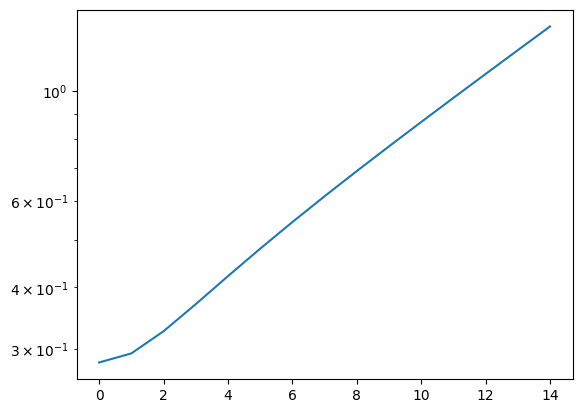

In [163]:
import matplotlib.pyplot as plt
import numpy as np


def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0.1, 1., 1.05)  # Set initial values
xyzs2 = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs2[0] = (-0.2, 1., 1.05)
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
dist = list() # list of distances to obtain the Lyapunov exponent
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt
    xyzs2[i + 1] = xyzs2[i] + lorenz(xyzs2[i]) * dt
    dist.append( math.sqrt( (xyzs[i+1][0]-xyzs2[i+1][0])**2 + (xyzs[i+1][1]-xyzs2[i+1][1])**2 + (xyzs[i+1][2]-xyzs2[i+1][2])**2 ) )
    

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=1)
ax.plot(*xyzs2.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

plt.figure()
#print(dist)
#plt.yscale('log')
plt.plot(dist, lw=0.5)
plt.title("Coeficiente de Lyapunov")
plt.xlabel("tempo")
plt.ylabel("$\\lambda$")
plt.show()

dist_zoom=dist[:15]
print(dist_zoom)
#print(dist)
plt.figure()
plt.plot(dist_zoom)
plt.yscale('log')
plt.show()

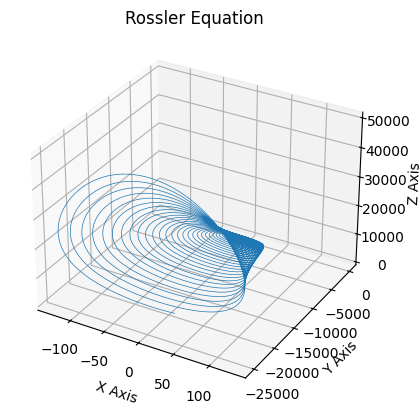

In [80]:
# Rössler - method 2

import matplotlib.pyplot as plt
import numpy as np

a = math.sqrt(2)
b = 1.0
c = math.sqrt(2)

def rossler(xyz, *, a=math.sqrt(2), b=1.0, c=math.sqrt(2)):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the system's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = -y-z
    y_dot = x+a*y
    z_dot = b*x-c*z+x*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.0001
num_steps = 100000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + rossler(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Rossler Equation")

plt.show()

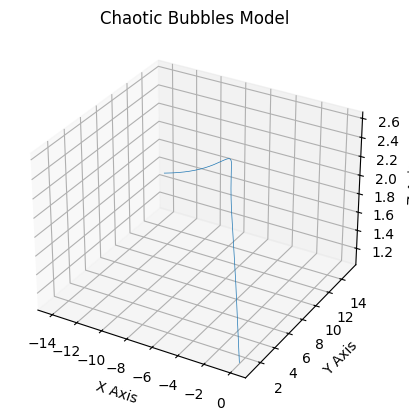

In [108]:
# Banking Bubbles - method 2

import matplotlib.pyplot as plt
import numpy as np



xi = 0.5556 # (0,1)
theta = 0.055 # (0,1)

# parameters
#r_k = 0.5 # 
r = 0.015 # Miao and Wang r = 0.015
#r = 0.045 # OGY r = 0.045
# capital parameters:
alpha = 0.33
delta = 0.1






def bubbles(xyz):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the system's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    r_k = alpha*math.pow(z + xi*x*z +y, alpha - 1) - delta
    x_dot = r*x-x*(r_k+(r_k-r)*xi*x)-theta*(1-x)
    y_dot = r*y-x*(r_k-r)*y
    z_dot = (r_k-theta+(r_k-r)*xi*x)*z + (r_k-r)*y
    return np.array([x_dot, y_dot, z_dot])


dt = 0.00001
num_steps = 5000000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0.1, 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + bubbles(xyzs[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Chaotic Bubbles Model")

plt.show()



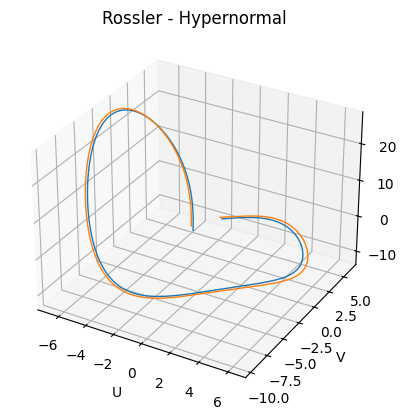

In [142]:
# Hypernormal Rössler - method 2

import matplotlib.pyplot as plt
import numpy as np

a = math.sqrt(2)
b = 1.0
c = math.sqrt(2)

def hyper_rossler(xyz, *, a=math.sqrt(2), b=1.0, c=math.sqrt(2)):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the system's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = y
    y_dot = z
    z_dot = -x*z/2 + 3*math.sqrt(2)*x*y/4 -(x**2)/2-5*x**2*y/24+math.sqrt(2)*x*z**2/64
    return np.array([x_dot, y_dot, z_dot])


dt = 0.0001
num_steps = 60000

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs2 = np.empty((num_steps + 1, 3))  # Need one more for the initial values
xyzs[0] = (0.1, 1., 1.05)  # Set initial values
xyzs2[0] = (-0.1, 1.1, 1.1)
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + hyper_rossler(xyzs[i]) * dt
for i in range(num_steps):
    xyzs2[i + 1] = xyzs2[i] + hyper_rossler(xyzs2[i]) * dt

# Plot
ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=1)
ax.set_xlabel("U")
ax.set_ylabel("V")
ax.set_zlabel("W")
ax.set_title("Rossler - Hypernormal")
ax.plot(*xyzs2.T, lw=1)

plt.show()